In [292]:
import pandas as pd
import dateutil.parser
import datetime

###NOAA weather data

In [293]:
weather = pd.read_csv('/Users/damoncrockett/Dropbox/TwitterPaper/data/twitter/weather_2013.csv')

In [294]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49429072 entries, 0 to 49429071
Data columns (total 8 columns):
WBAN                int64
Date                int64
Time                int64
SkyCondition        object
DryBulbFarenheit    object
RelativeHumidity    object
WindSpeed           object
HourlyPrecip        object
dtypes: int64(3), object(5)
memory usage: 3.3+ GB


In [295]:
len(weather.index[weather.RelativeHumidity=='M'])

21823032

In [296]:
weather.head()

,WBAN,Date,Time,SkyCondition,DryBulbFarenheit,RelativeHumidity,WindSpeed,HourlyPrecip
0,3011,20130101,0,OVC,M,M,5,
1,3011,20130101,15,SCT011 SCT020,M,M,6,
2,3011,20130101,35,CLR,M,M,6,
3,3011,20130101,55,CLR,M,M,5,
4,3011,20130101,115,CLR,M,M,0,


In [297]:
tweets = pd.read_csv('/Users/damoncrockett/Dropbox/TwitterPaper/data/twitter/US_HSV_modes_top60_cities_wban.csv')

In [298]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7971556 entries, 0 to 7971555
Data columns (total 22 columns):
image.path    object
filename      object
img_url       object
size_h        int64
size_w        int64
lat           float64
lon           float64
postedTime    object
mongo_id      object
location      object
R.mode        int64
G.mode        int64
B.mode        int64
R.entropy     float64
G.entropy     float64
B.entropy     float64
city          object
H.mode        int64
S.mode        int64
V.mode        int64
hour          int64
WBAN          int64
dtypes: float64(5), int64(10), object(7)
memory usage: 1.4+ GB


In [299]:
len(tweets.img_url.value_counts())

7588558

In [300]:
tweets.drop_duplicates(subset ='img_url', inplace=True)

In [301]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588558 entries, 0 to 7971555
Data columns (total 22 columns):
image.path    object
filename      object
img_url       object
size_h        int64
size_w        int64
lat           float64
lon           float64
postedTime    object
mongo_id      object
location      object
R.mode        int64
G.mode        int64
B.mode        int64
R.entropy     float64
G.entropy     float64
B.entropy     float64
city          object
H.mode        int64
S.mode        int64
V.mode        int64
hour          int64
WBAN          int64
dtypes: float64(5), int64(10), object(7)
memory usage: 1.3+ GB


In [302]:
tweets.reset_index(drop=True,inplace=True)

In [303]:
tweet_wbans = list(set(list(tweets.WBAN)))

In [304]:
len(tweet_wbans)

140

In [305]:
len(tweets.WBAN.value_counts())

140

In [306]:
weather_subset = weather[weather.WBAN.isin(tweet_wbans)]

In [307]:
len(weather_subset.WBAN.value_counts())

133

In [308]:
weather_subset_wbans = list(set(list(weather_subset.WBAN)))

In [309]:
len(weather_subset_wbans)

133

In [310]:
missing_wbans = list(set(tweet_wbans) - set(weather_subset_wbans))

In [311]:
missing_wbans

[53894, 23271, 13777, 93901, 12945, 12946, 3929]

In [312]:
tweets_without_weather = tweets[['city','lat','lon','filename']][tweets.WBAN.isin(missing_wbans)]

In [313]:
len(tweets_without_weather.index)

238381

In [314]:
tweets_without_weather.city.value_counts()

houston           105534
baltimore          31843
sacramento         27387
kansas city        26918
dallas             23470
corpus christi     16223
jacksonville        7006
dtype: int64

In [315]:
wban_table = pd.read_table('/Users/damoncrockett/Dropbox/CALIT2DATA/weather/rawData/QCLCD201301/201301station.txt',
                          sep='|')

In [316]:
houston = wban_table[wban_table.Name.str.contains('HOUSTON')]
baltimore = wban_table[wban_table.Name.str.contains('BALTIMORE')]
sacramento = wban_table[wban_table.Name.str.contains('SACRAMENTO')]
kansas_city = wban_table[wban_table.Name.str.contains('KANSAS CITY')]
dallas = wban_table[wban_table.Name.str.contains('DALLAS')]
corpus_christi = wban_table[wban_table.Name.str.contains('CORPUS CHRISTI')]
jacksonville = wban_table[wban_table.Name.str.contains('JACKSONVILLE')]

In [317]:
weather_wbans = list(set(list(weather.WBAN)))

In [318]:
houston = houston[houston.WBAN.isin(weather_wbans)]
baltimore = baltimore[baltimore.WBAN.isin(weather_wbans)]
sacramento = sacramento[sacramento.WBAN.isin(weather_wbans)]
kansas_city = kansas_city[kansas_city.WBAN.isin(weather_wbans)]
dallas = dallas[dallas.WBAN.isin(weather_wbans)]
corpus_christi = corpus_christi[corpus_christi.WBAN.isin(weather_wbans)]
jacksonville = jacksonville[jacksonville.WBAN.isin(weather_wbans)]

In [319]:
houston = houston[['WBAN','Latitude','Longitude']]
baltimore = baltimore[['WBAN','Latitude','Longitude']]
sacramento = sacramento[['WBAN','Latitude','Longitude']]
kansas_city = kansas_city[['WBAN','Latitude','Longitude']]
dallas = dallas[['WBAN','Latitude','Longitude']]
corpus_christi = corpus_christi[['WBAN','Latitude','Longitude']]
jacksonville = jacksonville[['WBAN','Latitude','Longitude']]

In [320]:
frames = [houston,baltimore,sacramento,kansas_city,dallas,corpus_christi,jacksonville]
alternate_weather_stations = pd.concat(frames)

In [321]:
from shapely.geometry import Point
import shapely

In [322]:
alternate_weather_station_wbans = list(alternate_weather_stations.WBAN)
alternate_weather_station_points = []
m = len(alternate_weather_stations.index)
alternate_weather_stations.reset_index(drop=True,inplace=True)
for j in range(m):
    station_point = Point(alternate_weather_stations.Longitude.loc[j],
                          alternate_weather_stations.Latitude.loc[j])
    alternate_weather_station_points.append(station_point)

In [323]:
alt_wban = []
n = len(tweets_without_weather.index)
tweets_without_weather.reset_index(drop=True,inplace=True)
for i in range(n):
    tweet_point = Point(tweets_without_weather.lon.loc[i],tweets_without_weather.lat.loc[i])
    closest_station_point = min(alternate_weather_station_points,key=lambda x:x.distance(tweet_point))
    closest_station_point_idx = alternate_weather_station_points.index(closest_station_point)
    closest_station_wban = alternate_weather_station_wbans[closest_station_point_idx]
    alt_wban.append(closest_station_wban)
tweets_without_weather['alt_wban'] = alt_wban

In [324]:
tweets_without_weather = tweets_without_weather[['filename','alt_wban']]

In [325]:
tweets_without_weather.set_index('filename',inplace=True)

In [326]:
tweets = tweets.join(tweets_without_weather,on='filename')

In [327]:
len(tweets.index)

7588558

In [328]:
len(tweets.filename.value_counts())

7588558

####Okay now we can re-subset our weather data

In [329]:
tweet_wbans = list(tweets.WBAN)

In [330]:
tweet_alt_wbans = list(tweets.alt_wban[tweets.alt_wban.notnull()])

In [331]:
tweet_wbans = list(set(tweet_wbans + tweet_alt_wbans))

In [332]:
len(tweet_wbans)

141

In [333]:
weather_subset = weather[weather.WBAN.isin(tweet_wbans)]

In [334]:
len(weather_subset.WBAN.value_counts())

134

Okay this looks wrong, but it's actually what we should expect: there are 141 total WBANs in the tweet data, and only 134 in the weather. That's because we still have the 7 WBANs in the tweet data that are missing from the weather data. But that's okay. We'll join weather on WBAN and then on alt_wban (which we'll have to rename for the purposes of the join), and every row should have weather.

####Back to the weather data

Okay we need to make date and time into strings, zero fill the times to 4 digits, combine the strings, and then run a datetime operation on them. Easy peasy in python:

In [335]:
# first we'll reassign 'weather' to our subset

weather = weather_subset

In [336]:
# make datetime objects

weather['Date'] = weather.Date.apply(str)
weather['Time'] = weather.Time.apply(str)
weather['Time'] = weather.Time.map(lambda x: x.zfill(4))

# we call these 'resolution' because we will resolve to these datetime values
weather['resolution'] = weather.Date + weather.Time
weather['resolution'] = weather.resolution.map(lambda x: datetime.datetime.strptime(x, '%Y%m%d%H%M'))

In [337]:
weather.head()

,WBAN,Date,Time,SkyCondition,DryBulbFarenheit,RelativeHumidity,WindSpeed,HourlyPrecip,resolution
6304,3017,20130101,0053,FEW036 SCT140,11,77,8,,2013-01-01 00:53:00
6305,3017,20130101,0153,FEW036 SCT140,11,77,5,,2013-01-01 01:53:00
6306,3017,20130101,0253,SCT140,7,76,0,,2013-01-01 02:53:00
6307,3017,20130101,0353,BKN065,12,73,5,,2013-01-01 03:53:00
6308,3017,20130101,0453,BKN050,10,76,7,,2013-01-01 04:53:00


Great. Now we can delete the original columns.

In [338]:
del weather['Date']
del weather['Time']

In [339]:
weather.tail()

,WBAN,SkyCondition,DryBulbFarenheit,RelativeHumidity,WindSpeed,HourlyPrecip,resolution
49377444,94974,CLR110,-11,M,3,,2013-12-31 22:34:00
49377445,94974,CLR110,-9,M,5,,2013-12-31 22:54:00
49377446,94974,CLR110,-9,M,5,,2013-12-31 23:14:00
49377447,94974,CLR110,-9,M,3,,2013-12-31 23:34:00
49377448,94974,BKN090 OVC110,-9,67,5,,2013-12-31 23:54:00


In [340]:
weather.reset_index(drop=True,inplace=True)

## sky variable

Our sky variable has linear information (both in fraction of sky covered and height of cloud layer(s)), and we should preserve at least some of it, as we should expect that some linear relationship exists between the fraction of sky covered and what the sky looks like, at least.

In [341]:
# sky is reported in layers, min = 1 and max = 3; break those out

sky = pd.DataFrame(weather.SkyCondition.str.split(' ',2).tolist(),
                       columns = ['sky1','sky2','sky3'])

In [342]:
sky.head(15)

,sky1,sky2,sky3
0,FEW036,SCT140,None
1,FEW036,SCT140,None
2,SCT140,None,None
3,BKN065,None,None
4,BKN050,None,None
5,FEW050,BKN140,None
6,BKN140,None,None
7,FEW050,BKN150,None
8,FEW050,SCT120,BKN160
9,SCT049,BKN140,None


In [343]:
del weather['SkyCondition']

In [344]:
# add results of split back to the weather df

weather['sky1'] = sky.sky1
weather['sky2'] = sky.sky2
weather['sky3'] = sky.sky3

In [345]:
# make sure all weather values are strings

weather.sky1 = weather.sky1.map(lambda x: str(x))
weather.sky2 = weather.sky2.map(lambda x: str(x))
weather.sky3 = weather.sky3.map(lambda x: str(x))

In [346]:
# remove all missing data labeled 'M'

weather = weather[weather.sky1 != 'M']

In [347]:
# reset index again

weather.reset_index(drop=True,inplace=True)

In [348]:
weather.head()

,WBAN,DryBulbFarenheit,RelativeHumidity,WindSpeed,HourlyPrecip,resolution,sky1,sky2,sky3
0,3017,11,77,8,,2013-01-01 00:53:00,FEW036,SCT140,None
1,3017,11,77,5,,2013-01-01 01:53:00,FEW036,SCT140,None
2,3017,7,76,0,,2013-01-01 02:53:00,SCT140,None,None
3,3017,12,73,5,,2013-01-01 03:53:00,BKN065,None,None
4,3017,10,76,7,,2013-01-01 04:53:00,BKN050,None,None


In [349]:
"""
From our sky columns (the result of the sky variable split), 
make 3 new dataframes, one for each column, which we will 
use to compute final sky-cover values; use regex to separate 
words from numbers.

"""

import re
sky1 = pd.DataFrame(weather.sky1.map(lambda x: re.findall(r"[^\W\d_]+|\d+", x)).tolist())
sky2 = pd.DataFrame(weather.sky2.map(lambda x: re.findall(r"[^\W\d_]+|\d+", x)).tolist())
sky3 = pd.DataFrame(weather.sky3.map(lambda x: re.findall(r"[^\W\d_]+|\d+", x)).tolist())

Okay, now we have all the information split up so we can explore it. We don't know exactly yet what to keep, or how to model the sky cover, but let's take a look:

In [350]:
sky1.head(15)

,0,1,2
0,FEW,036,None
1,FEW,036,None
2,SCT,140,None
3,BKN,065,None
4,BKN,050,None
5,FEW,050,None
6,BKN,140,None
7,FEW,050,None
8,FEW,050,None
9,SCT,049,None


Let's see what types of sky cover are most common in Central Park:

In [351]:
sky1[0].value_counts()

CLR    530360
FEW    308967
SCT    239291
BKN    215255
OVC    205264
VV      12979
dtype: int64

In [352]:
sky2[0].value_counts()

None    1019989
BKN      220075
SCT      139341
OVC      126226
FEW        4172
CLR        2303
VV           10
dtype: int64

In [353]:
sky3[0].value_counts()

None    1306137
OVC      105374
BKN       78998
SCT       19409
CLR        2103
FEW          94
VV            1
dtype: int64

####NOAA handbook

http://www.nws.noaa.gov/om/forms/resources/SFCTraining.pdf

According to the NOAA training handbook for weather observers, sky cover is determined as follows (briefly):

The cloud cover is split into layers, with a max of three. It is then determined how much of the sky is covered in the first layer. The measurement of cloud cover at the second and third layers is a cumulative. That's good for us, because all we want to know is how much of the sky is covered. Layers are given heights in hundreds of feet, but we won't bother with that information, since it's not clear how we'd use it to measure anything affecting people on the ground.

## The Sky Variable

So, our computation is simple: give fractions for sky cover codes, per the NOAA definitions. Then find the cumulative max for each observation. That fraction will be our sky value.

In [354]:
# change condition codes to fractions of sky cover per definitions in NOAA doc

d = {'CLR': 0,
     'FEW': 0.1875,
     'SCT': 0.4375,
     'BKN': 0.75,
     'OVC': 1,
     'VV': 1,
     'None': 0}

sky1[0].replace(d, inplace=True)
sky2[0].replace(d, inplace=True)
sky3[0].replace(d, inplace=True)

In [355]:
# add to weather df make sure everything is float

weather['sky1'] = sky1[0]
weather['sky2'] = sky2[0]
weather['sky3'] = sky3[0]

weather['sky1'] = weather.sky1.map(lambda x: float(x))
weather['sky2'] = weather.sky2.map(lambda x: float(x))
weather['sky3'] = weather.sky3.map(lambda x: float(x))

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [356]:
# find max across the 3 columns for each observation

weather['sky'] = weather[['sky1','sky2','sky3']].max(axis=1)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [357]:
weather.head(15)

,WBAN,DryBulbFarenheit,RelativeHumidity,WindSpeed,HourlyPrecip,resolution,sky1,sky2,sky3,sky
0,3017,11,77,8,,2013-01-01 00:53:00,0.1875,0.4375,0.00,0.4375
1,3017,11,77,5,,2013-01-01 01:53:00,0.1875,0.4375,0.00,0.4375
2,3017,7,76,0,,2013-01-01 02:53:00,0.4375,0.0000,0.00,0.4375
3,3017,12,73,5,,2013-01-01 03:53:00,0.7500,0.0000,0.00,0.7500
4,3017,10,76,7,,2013-01-01 04:53:00,0.7500,0.0000,0.00,0.7500
5,3017,11,73,10,,2013-01-01 05:53:00,0.1875,0.7500,0.00,0.7500
6,3017,12,73,9,,2013-01-01 06:53:00,0.7500,0.0000,0.00,0.7500
7,3017,12,80,6,,2013-01-01 07:53:00,0.1875,0.7500,0.00,0.7500
8,3017,17,74,5,,2013-01-01 08:53:00,0.1875,0.4375,0.75,0.7500
9,3017,21,71,5,,2013-01-01 09:53:00,0.4375,0.7500,0.00,0.7500


In [358]:
# remove individual sky columns

del weather['sky1']
del weather['sky2']
del weather['sky3']

In [359]:
weather.head()

,WBAN,DryBulbFarenheit,RelativeHumidity,WindSpeed,HourlyPrecip,resolution,sky
0,3017,11,77,8,,2013-01-01 00:53:00,0.4375
1,3017,11,77,5,,2013-01-01 01:53:00,0.4375
2,3017,7,76,0,,2013-01-01 02:53:00,0.4375
3,3017,12,73,5,,2013-01-01 03:53:00,0.7500
4,3017,10,76,7,,2013-01-01 04:53:00,0.7500


####Voila! We have a sky variable.

In [360]:
weather = weather[weather.DryBulbFarenheit != 'M']

In [361]:
# clean up wind variable

weather = weather[weather.WindSpeed != 'M']

In [362]:
len(weather.index[weather.WindSpeed=='  '])      # two spaces

1036

In [363]:
d = {"  ": 0}

weather.WindSpeed.replace(d, inplace=True)

In [364]:
# clean up precipitation variable

d = {" ": 0,
     "T": 0.001,
     "  T": 0.001}

weather.HourlyPrecip.replace(d, inplace=True)

In [365]:
# reset index once more

weather.reset_index(drop=True,inplace=True)

In [366]:
# make sure everything a float once again

weather.DryBulbFarenheit = weather.DryBulbFarenheit.map(lambda x: float(x))
weather.WindSpeed = weather.WindSpeed.map(lambda x: float(x))
weather.HourlyPrecip = weather.HourlyPrecip.map(lambda x: float(x))
weather.sky = weather.sky.map(lambda x: float(x))

In [367]:
# Finally we have a clean dataframe!

weather.head(15)

,WBAN,DryBulbFarenheit,RelativeHumidity,WindSpeed,HourlyPrecip,resolution,sky
0,3017,11,77,8,0,2013-01-01 00:53:00,0.4375
1,3017,11,77,5,0,2013-01-01 01:53:00,0.4375
2,3017,7,76,0,0,2013-01-01 02:53:00,0.4375
3,3017,12,73,5,0,2013-01-01 03:53:00,0.7500
4,3017,10,76,7,0,2013-01-01 04:53:00,0.7500
5,3017,11,73,10,0,2013-01-01 05:53:00,0.7500
6,3017,12,73,9,0,2013-01-01 06:53:00,0.7500
7,3017,12,80,6,0,2013-01-01 07:53:00,0.7500
8,3017,17,74,5,0,2013-01-01 08:53:00,0.7500
9,3017,21,71,5,0,2013-01-01 09:53:00,0.7500


####Now let's rename the columns to make them a bit easier to type

In [368]:
weather.rename(columns = {'DryBulbFarenheit':'temp',
                          'RelativeHumidity':'humidity',
                          'WindSpeed':'wind',
                          'HourlyPrecip':'rain'},
               inplace=True)

####some histograms

In [369]:
%matplotlib inline

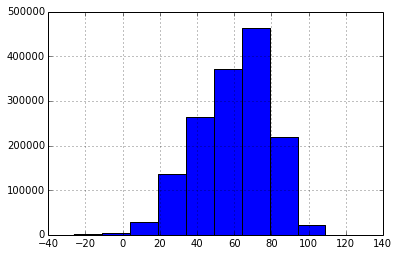

In [370]:
weather.temp.hist()

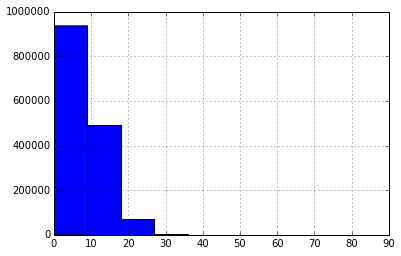

In [371]:
weather.wind.hist()

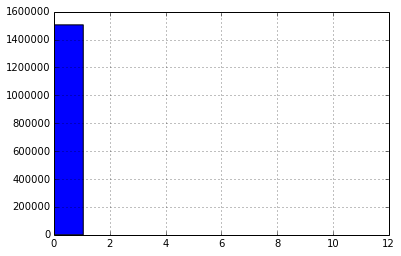

In [372]:
weather.rain.hist()

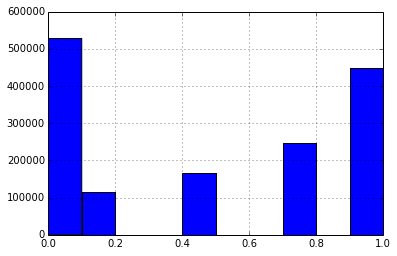

In [373]:
weather.sky.hist()

###Join

Okay, now we need to join this weather data to the Twitter dataset. This is going to be a little tricky, because we are joining both on WBAN and on time. Since the weather observations are hourly, we'll just join on hour, which is nice. First, we'll need to parse the Twitter times.

In [374]:
tweets.head()

,image.path,filename,img_url,size_h,size_w,lat,lon,postedTime,mongo_id,location,...,R.entropy,G.entropy,B.entropy,city,H.mode,S.mode,V.mode,hour,WBAN,alt_wban
0,/data/myazdani/images/2013/2013-01-01/00/A-6iy...,A-6iyQmCYAE9w8B.jpg,http://pbs.twimg.com/media/A-6iyQmCYAE9w8B.jpg,684,500,39.938049,-82.886912,2013-01-01T00:40:38.000Z,53dc81ddad12874a4a2c188f,Columbus,...,5.089188,5.034659,4.806793,columbus,20,51,255,19,14821,NaN
1,/data/myazdani/images/2013/2013-01-01/00/A_e-7...,A_e-7RzCIAAQWFF.jpg,http://pbs.twimg.com/media/A_e-7RzCIAAQWFF.jpg,1024,768,33.805219,-84.300265,2013-01-01T00:35:22.000Z,53dc81dfad12874a4a2c2e3e,North Decatur,...,4.734248,5.024152,5.300740,atlanta,8,124,149,19,53863,NaN
2,/data/myazdani/images/2013/2013-01-01/00/A_e-C...,A_e-CPHCAAES9Vc.jpg,http://pbs.twimg.com/media/A_e-CPHCAAES9Vc.jpg,640,480,43.044368,-87.932791,2013-01-01T00:31:28.000Z,53dc81dfad12874a4a2c2add,Milwaukee,...,4.844191,5.060838,5.198493,milwaukee,12,161,255,18,14839,NaN
3,/data/myazdani/images/2013/2013-01-01/00/A_e-C...,A_e-Cq-CAAAoL2K.jpg,http://pbs.twimg.com/media/A_e-Cq-CAAAoL2K.jpg,1712,1024,39.235123,-94.567517,2013-01-01T00:31:32.000Z,53dc81dfad12874a4a2c2af3,Chouteau,...,5.092156,5.169272,5.325943,kansas city,20,85,13,18,13988,NaN
4,/data/myazdani/images/2013/2013-01-01/00/A_e-E...,A_e-EF1CcAAWPR-.jpg,http://pbs.twimg.com/media/A_e-EF1CcAAWPR-.jpg,576,1024,35.123170,-89.980648,2013-01-01T00:31:37.000Z,53dc81dfad12874a4a2c2af1,Memphis,...,4.859657,5.076914,5.309013,memphis,172,255,255,18,13893,NaN


In [375]:
tweets.postedTime = tweets.postedTime.apply(dateutil.parser.parse)

In [376]:
tweets[['postedTime','city','hour','WBAN','alt_wban']].head()

,postedTime,city,hour,WBAN,alt_wban
0,2013-01-01 00:40:38+00:00,columbus,19,14821,NaN
1,2013-01-01 00:35:22+00:00,atlanta,19,53863,NaN
2,2013-01-01 00:31:28+00:00,milwaukee,18,14839,NaN
3,2013-01-01 00:31:32+00:00,kansas city,18,13988,NaN
4,2013-01-01 00:31:37+00:00,memphis,18,13893,NaN


In [377]:
tweets['gmt_hour'] = tweets.postedTime.map(lambda x:x.hour)

In [378]:
tweets['hour_delta'] = tweets.hour - tweets.gmt_hour

In [379]:
tweets['hour_delta'].value_counts()

-5     1670826
-4     1177271
 19     826264
-6      793488
-7      776654
 17     647765
 18     522307
 20     403933
 16     391197
-8      378853
dtype: int64

In [380]:
tweets['gmt_date'] = tweets.postedTime.apply(datetime.datetime.date)

In [381]:
local_date = []
n = len(tweets.index)
for i in range(n):
    if tweets.hour_delta.loc[i] > 0:
        local_date.append(tweets.gmt_date.loc[i] - datetime.timedelta(days=1))
    else:
        local_date.append(tweets.gmt_date.loc[i])

In [382]:
len(tweets.index)

7588558

In [383]:
len(local_date)

7588558

In [384]:
tweets['local_date'] = local_date

In [385]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588558 entries, 0 to 7588557
Data columns (total 27 columns):
image.path    object
filename      object
img_url       object
size_h        int64
size_w        int64
lat           float64
lon           float64
postedTime    object
mongo_id      object
location      object
R.mode        int64
G.mode        int64
B.mode        int64
R.entropy     float64
G.entropy     float64
B.entropy     float64
city          object
H.mode        int64
S.mode        int64
V.mode        int64
hour          int64
WBAN          int64
alt_wban      float64
gmt_hour      int64
hour_delta    int64
gmt_date      object
local_date    object
dtypes: float64(6), int64(12), object(9)
memory usage: 1.6+ GB


In [386]:
tweets.alt_wban.fillna(value=tweets.WBAN,inplace=True)

In [387]:
tweets.alt_wban.head()

0    14821
1    53863
2    14839
3    13988
4    13893
Name: alt_wban, dtype: float64

In [388]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505312 entries, 0 to 1505311
Data columns (total 7 columns):
WBAN          1505312 non-null int64
temp          1505312 non-null float64
humidity      1505312 non-null object
wind          1505312 non-null float64
rain          1505312 non-null float64
resolution    1505312 non-null datetime64[ns]
sky           1505312 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 91.9+ MB


In [389]:
weather['hour'] = weather.resolution.map(lambda x:x.hour)

In [390]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505312 entries, 0 to 1505311
Data columns (total 8 columns):
WBAN          1505312 non-null int64
temp          1505312 non-null float64
humidity      1505312 non-null object
wind          1505312 non-null float64
rain          1505312 non-null float64
resolution    1505312 non-null datetime64[ns]
sky           1505312 non-null float64
hour          1505312 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 103.4+ MB


In [391]:
weather['local_date'] = weather.resolution.apply(datetime.datetime.date)

In [392]:
# okay this is hacky but the pandas multiindex joins are a bit under-documented

weather['index_string'] = weather.WBAN.apply(str) + weather.local_date.apply(str) + weather.hour.apply(str)

In [393]:
weather.drop_duplicates(subset='index_string',inplace=True)

In [394]:
weather.set_index('index_string',inplace=True)

In [399]:
del weather['WBAN']
del weather['local_date']
del weather['hour']

In [395]:
tweets.rename(columns={'WBAN':'WBAN_discarded','alt_wban':'WBAN'},inplace=True)

In [413]:
tweets['index_string'] = tweets.WBAN.apply(int).apply(str) + tweets.local_date.apply(str) + tweets.hour.apply(str)

In [414]:
tweets.index_string.head()

0    148212012-12-3119
1    538632012-12-3119
2    148392012-12-3118
3    139882012-12-3118
4    138932012-12-3118
Name: index_string, dtype: object

In [415]:
weather.head()

,temp,humidity,wind,rain,resolution,sky
index_string,,,,,,
30172013-01-010,11,77,8,0,2013-01-01 00:53:00,0.4375
30172013-01-011,11,77,5,0,2013-01-01 01:53:00,0.4375
30172013-01-012,7,76,0,0,2013-01-01 02:53:00,0.4375
30172013-01-013,12,73,5,0,2013-01-01 03:53:00,0.7500
30172013-01-014,10,76,7,0,2013-01-01 04:53:00,0.7500


In [418]:
del weather['resolution']

In [426]:
df = tweets.join(weather,on='index_string')

In [427]:
len(df.index)

7588558

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588558 entries, 0 to 7588557
Data columns (total 33 columns):
image.path        object
filename          object
img_url           object
size_h            int64
size_w            int64
lat               float64
lon               float64
postedTime        object
mongo_id          object
location          object
R.mode            int64
G.mode            int64
B.mode            int64
R.entropy         float64
G.entropy         float64
B.entropy         float64
city              object
H.mode            int64
S.mode            int64
V.mode            int64
hour              int64
WBAN_discarded    int64
WBAN              float64
gmt_hour          int64
hour_delta        int64
gmt_date          object
local_date        object
index_string      object
temp              float64
humidity          object
wind              float64
rain              float64
sky               float64
dtypes: float64(10), int64(12), object(11)
memory usage: 1.9+ GB

In [429]:
del df['WBAN_discarded']
del df['WBAN']
del df['gmt_hour']
del df['hour_delta']
del df['index_string']

In [431]:
del df['gmt_date']

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588558 entries, 0 to 7588557
Data columns (total 27 columns):
image.path    object
filename      object
img_url       object
size_h        int64
size_w        int64
lat           float64
lon           float64
postedTime    object
mongo_id      object
location      object
R.mode        int64
G.mode        int64
B.mode        int64
R.entropy     float64
G.entropy     float64
B.entropy     float64
city          object
H.mode        int64
S.mode        int64
V.mode        int64
hour          int64
local_date    object
temp          float64
humidity      object
wind          float64
rain          float64
sky           float64
dtypes: float64(9), int64(9), object(9)
memory usage: 1.6+ GB


In [433]:
df.to_csv('/Users/damoncrockett/Dropbox/TwitterPaper/data/twitter/US_HSV_modes_top60_cities_weather.csv',
          index=False)